In [518]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['axes.grid'] = False

In [519]:
# Get Data From the CSV File
df = pd.read_csv('D:\InfernoPrediction\Weather\dataset.csv')

In [520]:
# Check for Data Types
print("Data Types:", df.dtypes)

Data Types: dt                       int64
dt_iso                  object
timezone                 int64
city_name               object
lat                    float64
lon                    float64
temp                   float64
feels_like             float64
temp_min               float64
temp_max               float64
pressure               float64
sea_level              float64
grnd_level             float64
humidity                 int64
wind_speed             float64
wind_deg                 int64
rain_1h                float64
rain_3h                float64
snow_1h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object


In [521]:
# Convert dt_iso to Date Time
df['dt']=pd.to_datetime(df['dt'], unit='s')

In [522]:
# Get mean values for each day
df=df.set_index('dt',drop=False).resample('24h').mean()
df2=df.reset_index(level=0, inplace=True)
df

,dt,timezone,lat,lon,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id
0,2017-05-01,36000.0,-29.588744,152.332031,49.280000,44.964167,49.280000,49.280000,1021.770833,NaN,NaN,82.208333,5.173333,221.458333,NaN,NaN,NaN,NaN,68.083333,803.000000
1,2017-05-02,36000.0,-29.588744,152.332031,53.165000,48.962500,53.165000,53.165000,1021.112500,NaN,NaN,83.541667,6.785417,198.000000,NaN,NaN,NaN,NaN,47.375000,802.125000
2,2017-05-03,36000.0,-29.588744,152.332031,54.957500,48.617083,54.957500,54.957500,1025.050000,NaN,NaN,83.250000,11.287500,110.416667,0.474,NaN,NaN,NaN,81.583333,740.416667
3,2017-05-04,36000.0,-29.588744,152.332031,51.762500,44.232917,51.762500,51.762500,1029.116667,NaN,NaN,84.208333,12.173333,105.416667,0.410,NaN,NaN,NaN,69.833333,777.791667
4,2017-05-05,36000.0,-29.588744,152.332031,47.787500,40.579583,47.787500,47.787500,1029.587500,NaN,NaN,79.750000,9.292083,107.083333,NaN,NaN,NaN,NaN,32.916667,801.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,2020-01-28,39600.0,-29.588744,152.332031,79.137083,85.348750,79.137083,79.137083,1011.500000,NaN,NaN,77.000000,2.856667,185.833333,NaN,NaN,NaN,NaN,11.375000,800.500000
1003,2020-01-29,39600.0,-29.588744,152.332031,81.332917,89.511250,81.332917,81.332917,1013.666667,NaN,NaN,79.208333,2.704583,123.375000,NaN,1.593077,NaN,NaN,35.875000,638.250000
1004,2020-01-30,39600.0,-29.588744,152.332031,79.306250,86.792500,79.306250,79.306250,1015.333333,NaN,NaN,78.750000,1.984167,130.958333,NaN,0.602500,NaN,NaN,31.250000,700.625000
1005,2020-01-31,39600.0,-29.588744,152.332031,77.540833,82.774583,77.540833,77.540833,1016.000000,NaN,NaN,75.291667,2.820833,128.375000,NaN,NaN,NaN,NaN,21.250000,801.125000


In [523]:
# Get Wind Speed and date from the resampled data set
get_data = df['wind_speed']
get_data.index = df['dt']
get_data.head()

dt
2017-05-01     5.173333
2017-05-02     6.785417
2017-05-03    11.287500
2017-05-04    12.173333
2017-05-05     9.292083
Name: wind_speed, dtype: float64

In [524]:
# Function to process data Split how much data go for the history and to how much days that the prediction gives.0=1 day
def process_data(dataset, start, end, past_size,future_size):
  datas = []
  labels = []

  start = start + past_size
  if end is None:
    end = len(dataset) - future_size

  for i in range(start,end):
    indices = range(i-past_size, i)
    datas.append(np.reshape(dataset[indices], (past_size, 1)))
    labels.append(dataset[i+future_size])
  return np.array(datas), np.array(labels)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023930983400>],
      dtype=object)

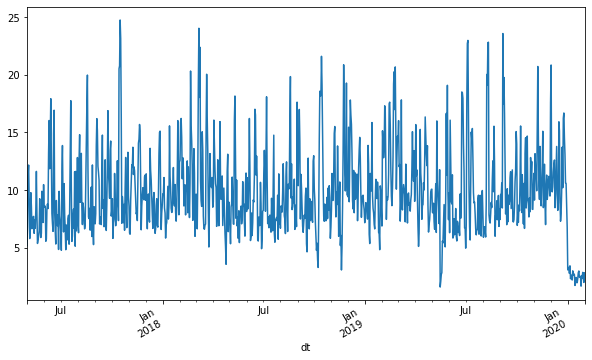

In [525]:
# Display how Rh chages with the Time
get_data.plot(subplots=True)

In [526]:
# Split 700 from the data set for training Total size=1007
TRAININGSIZE = 700  
get_data = get_data.values
# Get Mean for those trining set
get_train_mean = get_data[:TRAININGSIZE].mean()  
# Standerlized the data set
get_train_standered = get_data[:TRAININGSIZE].std()

In [527]:
get_data = (get_data-get_train_mean)/get_train_standered

In [528]:
get_data

array([-1.36539992, -0.90438915,  0.38308083, ..., -2.27741243,
       -2.03814915, -2.14634191])

In [529]:
# Use 90 days pst
past_size =90
# Predict 1 day in future
future_size =0

# Split data for  training
x_train, y_train = process_data(get_data, 0,TRAININGSIZE, past_size,future_size)

# Split data for Testing
x_test, y_test = process_data(get_data,TRAININGSIZE, None,past_size,future_size)

In [530]:
print ('Past history')
print (x_train[0])
print ('\nRelative Humidity To PRedict')
print (y_train[0])

Past history
[[-1.36539992]
 [-0.90438915]
 [ 0.38308083]
 [ 0.6364044 ]
 [-0.18755255]
 [-1.18905049]
 [-0.71767323]
 [-0.04897527]
 [-0.3903544 ]
 [-0.94418692]
 [-0.78714061]
 [-0.65916812]
 [-0.63807768]
 [-1.05857574]
 [-0.72970789]
 [-0.93024579]
 [-0.4759077 ]
 [ 0.47911978]
 [-0.57349566]
 [-1.30975452]
 [-1.22146065]
 [-1.1251834 ]
 [-0.99971316]
 [-0.20089792]
 [-0.91475563]
 [-1.16307469]
 [-1.0576225 ]
 [-0.01406285]
 [-0.3630679 ]
 [-0.79000033]
 [ 0.1508477 ]
 [-0.41156399]
 [-0.38177523]
 [-0.38463495]
 [-1.25565814]
 [-1.20215754]
 [-0.46470713]
 [-0.32851294]
 [-0.44337838]
 [ 0.93750914]
 [ 1.74228213]
 [ 0.54548912]
 [ 1.2785308 ]
 [ 2.28360339]
 [ 0.79309325]
 [-0.56050776]
 [-0.81156739]
 [-1.00960303]
 [ 1.41961034]
 [ 1.9979888 ]
 [-0.53905986]
 [-0.99780668]
 [-1.32417228]
 [-0.2433171 ]
 [-0.63760106]
 [-0.86959588]
 [-0.59792244]
 [-1.4586983 ]
 [-0.01585017]
 [-0.62365992]
 [-0.77129299]
 [-1.045707  ]
 [-1.47943127]
 [ 0.46827667]
 [ 1.12112702]
 [-0.2404573

In [531]:
# Function for create time axis (Standerlized data)
def time_axis(length):
  return list(range(-length, 0))

In [532]:
# Function for create a plot with actual and predicted future data
def create_plot(data,delta,plot_title):
  plot_labels = ['Past Data', 'Acctual Future', 'Predcted Future']
  plot_markers = ['.-', 'rx', 'go']
  time_bar = time_axis(data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(plot_title)
  for i, x in enumerate(data):
    if i:
      plt.plot(future,data[i],plot_markers[i],markersize=12,
               label=plot_labels[i])
    else:
      plt.plot(time_bar,data[i].flatten(), plot_markers[i], label=plot_labels[i])
  plt.legend()
  plt.xlim([time_bar[0], (future+5)*2])
  plt.xlabel('Time')
  plt.ylabel('Relative Humidity')
  return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\Anaconda3\\envs\\yasas_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

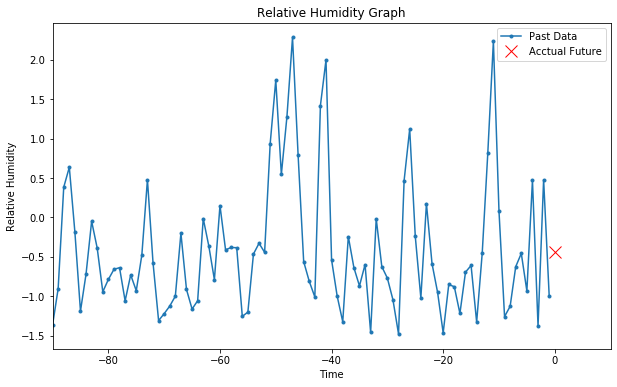

In [533]:
# Display sample graph
create_plot([x_train[0], y_train[0]], 0, 'Relative Humidity Graph')

In [534]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

validation_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
validation_data = validation_data.batch(BATCH_SIZE).repeat()

In [535]:
# Layering in LSTM
RH_model = tf.keras.models.Sequential([
#   LSTM layer
    tf.keras.layers.LSTM(4, input_shape=x_train.shape[-2:]),
#     Dense Layer
    tf.keras.layers.Dense(1)
])

RH_model.compile(optimizer='adam', loss='mae')

In [536]:
for x, y in validation_data.take(1):
    print(RH_model.predict(x).shape)

(217, 1)


In [537]:
# Set Epochs and Intervel time
INTERVAL_TIME = 200
EPOCHS = 10

# Fit data to the model
RH_history=RH_model.fit(train_data, epochs=EPOCHS,
                      steps_per_epoch=INTERVAL_TIME,
                      validation_data=validation_data, validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 7s 37ms/step - loss: 0.7229 - val_loss: 0.8247
Epoch 2/10
200/200 [==============================] - 6s 30ms/step - loss: 0.6510 - val_loss: 0.7815
Epoch 3/10
200/200 [==============================] - 6s 30ms/step - loss: 0.6384 - val_loss: 0.7590
Epoch 4/10
200/200 [==============================] - 6s 30ms/step - loss: 0.6325 - val_loss: 0.7504
Epoch 5/10
200/200 [==============================] - 6s 28ms/step - loss: 0.6266 - val_loss: 0.7465
Epoch 6/10
200/200 [==============================] - 6s 28ms/step - loss: 0.6261 - val_loss: 0.7440
Epoch 7/10
200/200 [==============================] - 6s 29ms/step - loss: 0.6234 - val_loss: 0.7427
Epoch 8/10
200/200 [==============================] - 6s 30ms/step - loss: 0.6213 - val_loss: 0.7422
Epoch 9/10
200/200 [==============================] - 6s 29ms/step - loss: 0.6240 - val_loss: 0.7422
Epoch 10/10
200/200 [===========================

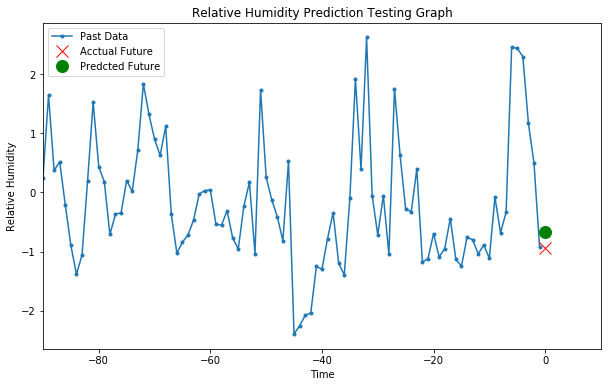

In [563]:
#One Validation Graph - Acctual and Predicted RH
for x, y in validation_data.take(1):
  plot = create_plot([x[0].numpy(), y[0].numpy(),
                    RH_model.predict(x)[0]], 0, 'Relative Humidity Prediction Testing Graph')
  plot.show()

In [539]:
# Function to Display Training and Validation Loss
def trainig_validation_loss(model_history, title):
  training_loss = model_history.history['loss']
  validation_loss = model_history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

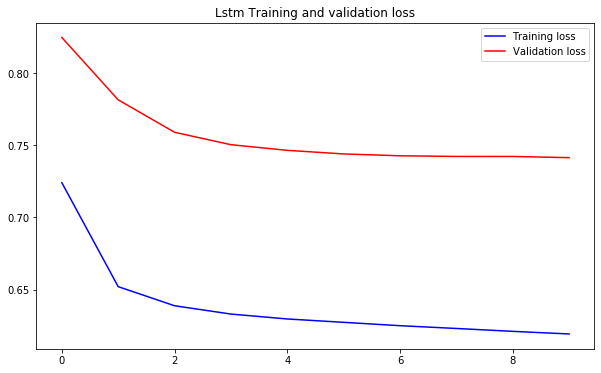

In [540]:
# Training and Validation Loss for the RH Prediction
plot_train_history(RH_history,
                    'Lstm Training and validation loss')

In [541]:
# Final Loss
final_loss = RH_model.evaluate(x_test,y_test,verbose=2)

217/217 - 0s - loss: 0.7414


In [542]:
# Save the Model
RH_model.save('RHPrediction.h5') 

In [543]:
# Predict humidity since 2018.08.01 to 2020.02 before one day 
predict_data = df['humidity']
predict_data.index = df['dt']
predict_data.head()
OUTPUT_SPLIT = 737
predict_data = predict_data.values
predict_train_mean = predict_data[OUTPUT_SPLIT:].mean()
predict_train_std = predict_data[OUTPUT_SPLIT:].std()

In [544]:
predict_data = (predict_data[OUTPUT_SPLIT:]-predict_train_mean)/predict_train_std

In [545]:
len(predict_data)

270

In [546]:

x_test, y_test = process_data(predict_data,0,270,
                                       90,
                                       future_size)
# Predict the RH
x=RH_model.predict(x_test)
len(x)

180

In [547]:
# denormalized acctual data
denormalized=[]
for i in y_test:
    denormalized.append(i*output_train_std+ouput_train_mean)
denormalized

[54.02640707329921,
 68.51158970242946,
 45.969806936636,
 57.449418530327115,
 60.07929318633635,
 67.88542907004631,
 74.85668411057873,
 65.17206632971931,
 63.33532847472874,
 61.66556678837367,
 53.483734525233814,
 44.30004525028093,
 49.51805052014052,
 42.421563353131475,
 41.75365867858944,
 50.97909199570121,
 59.411388511794314,
 58.07557916271027,
 54.02640707329921,
 50.645139658430196,
 69.09600629265373,
 57.95034703623364,
 64.04497719142965,
 70.30658351526117,
 79.32329662157855,
 72.5607617918405,
 68.59507778674721,
 38.49762339019705,
 40.0421529500755,
 37.161814041113,
 41.58668250995393,
 27.018011796505938,
 41.75365867858944,
 35.826004692028945,
 43.256444196309005,
 53.77594282034595,
 68.38635757595283,
 36.03472490282333,
 49.47630647798165,
 58.78522787941117,
 43.59039653358002,
 27.393708175935828,
 59.87057297554197,
 66.04869121505573,
 64.4624176130184,
 69.55519075640139,
 60.788941903037255,
 67.50973269061642,
 42.33807526881372,
 59.7035968069064

In [548]:
# Denormalized predicteded data
denormalized=[]
for i in x:
    denormalized.append(i*output_train_std+ouput_train_mean)
denormalized

[array([60.302296], dtype=float32),
 array([55.512966], dtype=float32),
 array([66.65023], dtype=float32),
 array([49.224792], dtype=float32),
 array([61.788944], dtype=float32),
 array([58.316044], dtype=float32),
 array([65.08266], dtype=float32),
 array([67.77243], dtype=float32),
 array([60.261917], dtype=float32),
 array([61.610023], dtype=float32),
 array([59.738976], dtype=float32),
 array([55.19566], dtype=float32),
 array([51.714386], dtype=float32),
 array([55.816593], dtype=float32),
 array([50.48543], dtype=float32),
 array([52.070736], dtype=float32),
 array([56.508923], dtype=float32),
 array([59.84538], dtype=float32),
 array([57.71015], dtype=float32),
 array([56.090786], dtype=float32),
 array([54.71135], dtype=float32),
 array([67.10959], dtype=float32),
 array([55.064873], dtype=float32),
 array([63.796944], dtype=float32),
 array([64.68362], dtype=float32),
 array([71.27745], dtype=float32),
 array([64.62682], dtype=float32),
 array([64.04159], dtype=float32),
 arra

In [565]:
# Write in to a file
f = open("Relativehumidity.txt", "a")

for i in range(len(denormalized)):
    
    f.write(str(denormalized[i][0]))
    f.write("\n")
            
f.close()
f = open("Relativehumidity.txt", "r")
print(f.read())

60.302296
55.512966
66.65023
49.224792
61.788944
58.316044
65.08266
67.77243
60.261917
61.610023
59.738976
55.19566
51.714386
55.816593
50.48543
52.070736
56.508923
59.84538
57.71015
56.090786
54.71135
67.10959
55.064873
63.796944
64.68362
71.27745
64.62682
64.04159
46.914616
52.565144
49.22602
52.46909
45.469284
54.070152
48.148766
53.774704
57.4576
65.478386
45.319923
58.506596
58.60214
50.05312
46.157486
64.54908
61.046295
61.68649
65.068016
57.80569
65.15244
47.754257
63.79914
55.10616
75.51959
55.270515
48.665188
46.981766
64.1406
65.44744
55.71096
57.632244
46.963623
66.757614
46.77715
47.14459
51.51022
57.64898
61.882004
71.77816
67.308426
62.22006
61.859035
63.556767
55.27243
49.734455
57.00045
44.91702
63.681004
57.053436
59.408012
51.27843
53.373238
50.407017
51.312866
57.448257
59.714966
59.63388
62.415054
57.40372
61.464176
62.759113
60.11949
53.92479
51.767986
44.806168
45.728867
47.51273
45.259586
51.64453
52.149906
43.167427
52.0673
48.3466
45.862747
58.812183
53.77817
5

In [551]:
dates=df['dt']
tt=dates.values
tt=tt[827:]

In [566]:
# Write dates in to another file
f = open("dates.txt", "a")
for i in range(len(tt)):
    f.write(str(tt[i]))
    f.write("\n")
f.close()
f = open("dates.txt", "r")
print(f.read())
    

2019-08-06T00:00:00.000000000
2019-08-07T00:00:00.000000000
2019-08-08T00:00:00.000000000
2019-08-09T00:00:00.000000000
2019-08-10T00:00:00.000000000
2019-08-11T00:00:00.000000000
2019-08-12T00:00:00.000000000
2019-08-13T00:00:00.000000000
2019-08-14T00:00:00.000000000
2019-08-15T00:00:00.000000000
2019-08-16T00:00:00.000000000
2019-08-17T00:00:00.000000000
2019-08-18T00:00:00.000000000
2019-08-19T00:00:00.000000000
2019-08-20T00:00:00.000000000
2019-08-21T00:00:00.000000000
2019-08-22T00:00:00.000000000
2019-08-23T00:00:00.000000000
2019-08-24T00:00:00.000000000
2019-08-25T00:00:00.000000000
2019-08-26T00:00:00.000000000
2019-08-27T00:00:00.000000000
2019-08-28T00:00:00.000000000
2019-08-29T00:00:00.000000000
2019-08-30T00:00:00.000000000
2019-08-31T00:00:00.000000000
2019-09-01T00:00:00.000000000
2019-09-02T00:00:00.000000000
2019-09-03T00:00:00.000000000
2019-09-04T00:00:00.000000000
2019-09-05T00:00:00.000000000
2019-09-06T00:00:00.000000000
2019-09-07T00:00:00.000000000
2019-09-08